In [30]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

- 모델 정의/ 설정/ 학습

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [40]:
model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1)                # 회귀인 경우 activation 함수를 지정하지 않음.
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                420       
                                                                 
 dense_16 (Dense)            (None, 12)                372       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 회귀인 경우 metrics를 지정하지 않음
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=60, verbose=0) # validation_split = 주면 뒤에 뭐 나옴

Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 4219.3501
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1868.0508
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 729.7597
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 313.3556
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 267.5942
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 228.1317
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 158.0205
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 129.9112
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 115.7713
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 101.8549
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 93.9469
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 89.4351
Epoch 13/100
8/8 [===================

In [38]:
del model # (다시 돌리기 전에 꼭 전 모델 삭제해주기)

In [42]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=500, batch_size=60, verbose = 0)
# verbose = 0 하면 돌아가는 중에 화면에 안 뜸

- 학습과정 시각화

In [43]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

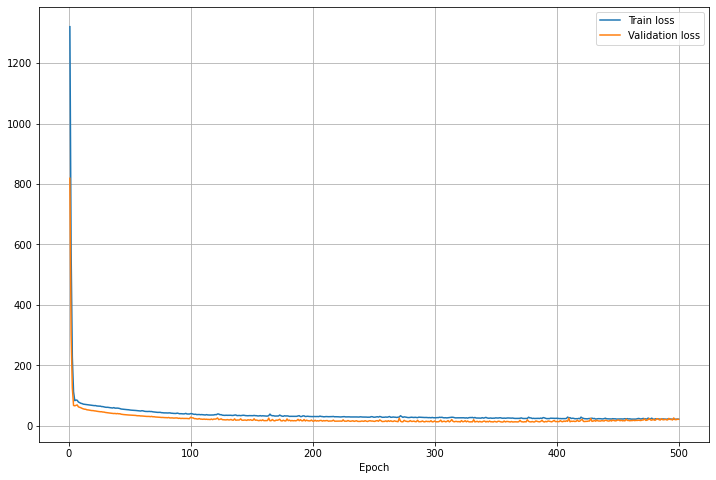

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='Train loss')
plt.plot(xs, y_vloss, label='Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.grid()
plt.show()

- 평가 및 예측

In [45]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 34.4332


34.43317794799805

In [46]:
pred = model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
mse, r2

(34.43317364055536, 0.5301980044002186)

In [48]:
df = pd.DataFrame({
    'y_test':y_test, 'pred':pred.reshape(51,)
})
df.head(10)

,y_test,pred
0,21.7,19.682280
1,15.6,17.313007
2,20.0,19.598131
3,12.8,14.482709
4,50.0,34.637516
5,20.6,17.370272
6,22.6,25.067907
7,24.1,27.378750
8,24.4,18.913342
9,36.1,34.103523


- 테스트 프로그램

In [49]:
index = 30
X_test[index], y_test[index]

(array([1.8836e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01,
        5.7860e+00, 3.3300e+01, 5.1004e+00, 3.0000e+00, 2.3300e+02,
        1.7900e+01, 3.9690e+02, 1.4150e+01]), 20.0)

In [51]:
pred_value = model.predict(X_test[index].reshape(1,-1))
pred_value

array([[17.429409]], dtype=float32)

In [52]:
print(f'실제값: {y_test[index]}, 예측값: {pred_value[0,0]:.2f}')

실제값: 20.0, 예측값: 17.43
